In [2]:
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 
import pandas as pd
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from sklearn import datasets, linear_model
import glob

# 1. Correlations.

In [187]:
data = pd.read_csv('DF1', sep=",", header=None)

In [188]:
#minor data cleanup/rearrange
df = data[[1,2,3,4]]
dff = df.iloc[1:]

In [189]:
dff.head(3)

,1,2,3,4
1,1.038502,0.899865,0.835053,-0.971528
2,0.320455,-0.647459,0.149079,0.352593
3,0.055480,2.234771,0.271672,-2.108739


# 1.a Calculate the covariance using Pandas

In [190]:
corr = dff.corr()
corr

,1,2,3,4
1,1.000000,-0.003998,0.990066,0.004111
2,-0.003998,1.000000,-0.004085,-0.990235
3,0.990066,-0.004085,1.000000,0.004067
4,0.004111,-0.990235,0.004067,1.000000


Use Seaborn pair plotting to see the same thing but in a visual format

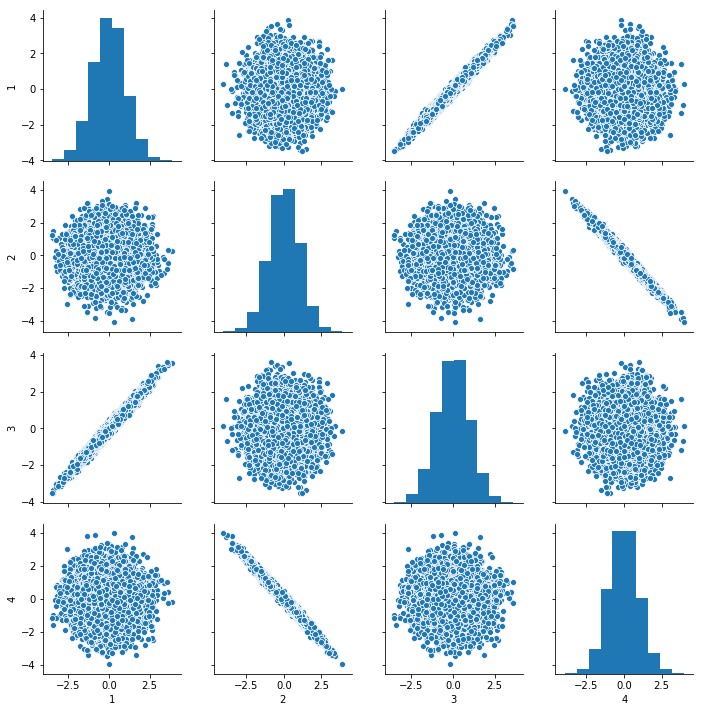

In [191]:
import seaborn as sns
sns.pairplot(dff,palette='coolwarm')

# 1.b Compute the covariance matrix of the data

In [192]:
dff2 = dff
A = dff2.values
# calculate the mean of each column
M = mean(A.T, axis=1)
#print(M)
# center columns by subtracting column means
C = A - M
#print(C)
# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)

[[ 1.00155793 -0.00401176  0.99162409  0.00412485]
 [-0.00401176  1.00537841 -0.00409877 -0.99545662]
 [ 0.99162409 -0.00409877  1.00158867  0.00408108]
 [ 0.00412485 -0.99545662  0.00408108  1.00516828]]


In [193]:
V.shape

(4, 4)

# Covariance : is used to analyze the linear relationship between two variables
A positive value indicates a direct or increasing relationship.
A negative value indicates a decreasing relationship.
Covariance with itself is nothing but variance which can be seen as then diagonal.
Covariance of a column with the other column are the off diagonal entries.

The result obtained matches with the plots that we got in the earlier step. If you observe the covariance of a
column with itself is 1, which we can see along the diagonal elements of the covarinace matrix V that we just
computed.


A positive value indicates increasing relationship and this can be seen in the plots that we obtained.
FOr example look at column 3 and row values and compare it to the plot. You could see a positive relationship.

# 1.c The above problem in reverse. Generate a zero-mean multivariate Gaussian random variable in 3 dimensions

We have given a covariance matrix: cov such that (X1,X2) and (X1,X3) are uncorrelated but (X2,X3) are correlated.
The covariance between X2 and X3 to 0.7 and set all other pairs to zeo in the cov matrix below.
Steps:
1. Change the n value and observe that for smaller values of 'n' the empirical covariance values of X2 and X3
   are apart from the value that we have entered. 
2. Increase the value of n > 1000 and observe that the empirical values converges with the true value. In this 
   case the value we have given in the covariance matrix is 0.7 and from the plot below we see that it converges 
   with the value we have entered.

In [19]:
#Step1 of solution , take a smaller value of n
   
mean = (0,0,0)
cov = np.array([[1, 0,0], [0,1,0.7],[0,0.7,1]]) 
mugd=np.array([])
vari=np.array([])
n = 100
for i in range (n):
    y=np.random.multivariate_normal(mean, cov, size=((i+2),))
    mugd = np.append(mugd,y)
    cov_matrix = np.cov(y, rowvar=False)
    c=cov_matrix[1][2]
    vari = np.append(vari,c)
vari


array([2.71985721, 0.85271468, 0.55206816, 1.03104196, 0.79117364,
       0.99791311, 1.49252067, 0.90248788, 0.58444127, 1.16289297,
       0.58521432, 0.85514325, 0.69681938, 0.61401949, 1.13332463,
       0.45474132, 0.71265047, 0.76252573, 0.96686487, 0.70462278,
       0.80235274, 0.85646682, 0.55583823, 0.6158774 , 0.46689829,
       0.78375521, 0.86396656, 0.65507937, 0.69481697, 0.49112614,
       0.63372025, 0.48074089, 0.84638255, 0.67847872, 0.69617701,
       0.62511507, 0.6060126 , 0.44697601, 0.54343898, 0.88024571,
       0.52695896, 0.38257706, 0.60705712, 0.46604187, 0.81288959,
       0.79800401, 0.5698428 , 0.66650305, 0.66266947, 0.68075342,
       0.77960777, 0.80593101, 0.51568695, 0.79349141, 0.82976376,
       0.27760322, 0.52577658, 0.98503314, 0.50585167, 0.81488211,
       0.84636416, 0.62630498, 0.71529174, 0.58440503, 1.03982016,
       0.50033135, 0.7946971 , 0.63995167, 0.99398257, 0.60125962,
       0.69851234, 0.65670982, 0.88477728, 0.55679211, 0.74002

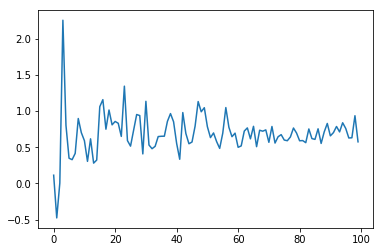

In [202]:
plt.plot(vari)
plt.show()
#observe that the empirical value is does not converge with the value that we gave

In [203]:
#Step2 of solution , take a larger value of n
   
mean = (0,0,0)
cov = np.array([[1, 0,0], [0,1,0.7],[0,0.7,1]]) 
mugd=np.array([])
vari=np.array([])
n = 2000
for i in range (n):
    y=np.random.multivariate_normal(mean, cov, size=((i+2),))
    mugd = np.append(mugd,y)
    cov_matrix = np.cov(y, rowvar=False)
    c=cov_matrix[1][2]
    vari = np.append(vari,c)
vari

array([-0.16272015,  2.64307771,  1.52234012, ...,  0.68494765,
        0.72011849,  0.72513496])

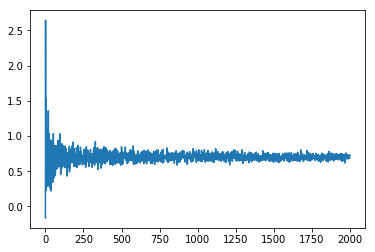

In [204]:
plt.plot(vari)
plt.show()
#observe that the empirical value converges with the value that we gave.

# 3. Even More Standard Error

In [91]:
x_i = np.array([])
y_i = np.array([])
beta_zero = -3
def yis(n):
#     nums = [0,1]
    x = np.random.normal(0,1,n)
    e = np.random.normal(0,1,n)
    y = beta_zero + e
    x_i = np.append(x_i,x)
    y_i = np.append(y_i,y)
n = 150
# yis(n)
def yis(n):
    x_
for i in range(n):
    x = np.random.normal(0,1,n)
    e = np.random.normal(0,1,n)
    y = -3 + e
    
fit = np.arange(150)
def getY(x):
    return beta_zero + e
    
# plt.hist(y,density=True)
# print("mean: {}".format(y.mean()))
#print("std dev: {}".format(y.std()))
# plt.scatter(x,y,1500)
# plt.plot(fit,getY(x))
# print(x_i)
# print(y_i)
# y_i
# plt.hist(y_i,n)
# fig= plt.figure()
# axes=fig.add_subplot(111)
# plt.plot(x,y)
# plt.show()

# y_i
# sigma_y = np.sum(y_i)
# sigma_y = sum(y_i)
# print(sigma_y)
# beta_hat = sigma_y/n ## 1/n*Sum of all ys
# print(beta_hat)

# fig= plt.figure()
# axes=fig.add_subplot(111)
# axes.plot(x_i,y_i)
# plt.show() 

# stdev = -3/np.sqrt(150)
# print(stdev)
from sklearn.linear_model import LinearRegression
xi = lambda n: np.random.normal(0, 1, n)
ei = lambda n: np.random.normal(0, 1, n)
beta = -3
beta_true = 0
def getBetaHat(n):
   X = xi(n)
   y = beta + beta_true * X + ei(n)
   r = LinearRegression().fit(X.reshape(-1,1), y.reshape(-1,1))
   return r.coef_[0][0]
beta_hats = lambda n, N=150: np.array([getBetaHat(n) for i in range(N)])
beta_hat_list = beta_hats(150)
betahat = beta_hat_list.mean()
print("mean: {}".format(betahat))
print("st dev: {}".format(y.std()))

mean: 0.0061495398971039795
st dev: 1.0682407183980096


The value -0.15 is stastically significant because it is more than two standard deviations beyond the empirical computation of the mean of beta hat, which was 0.006

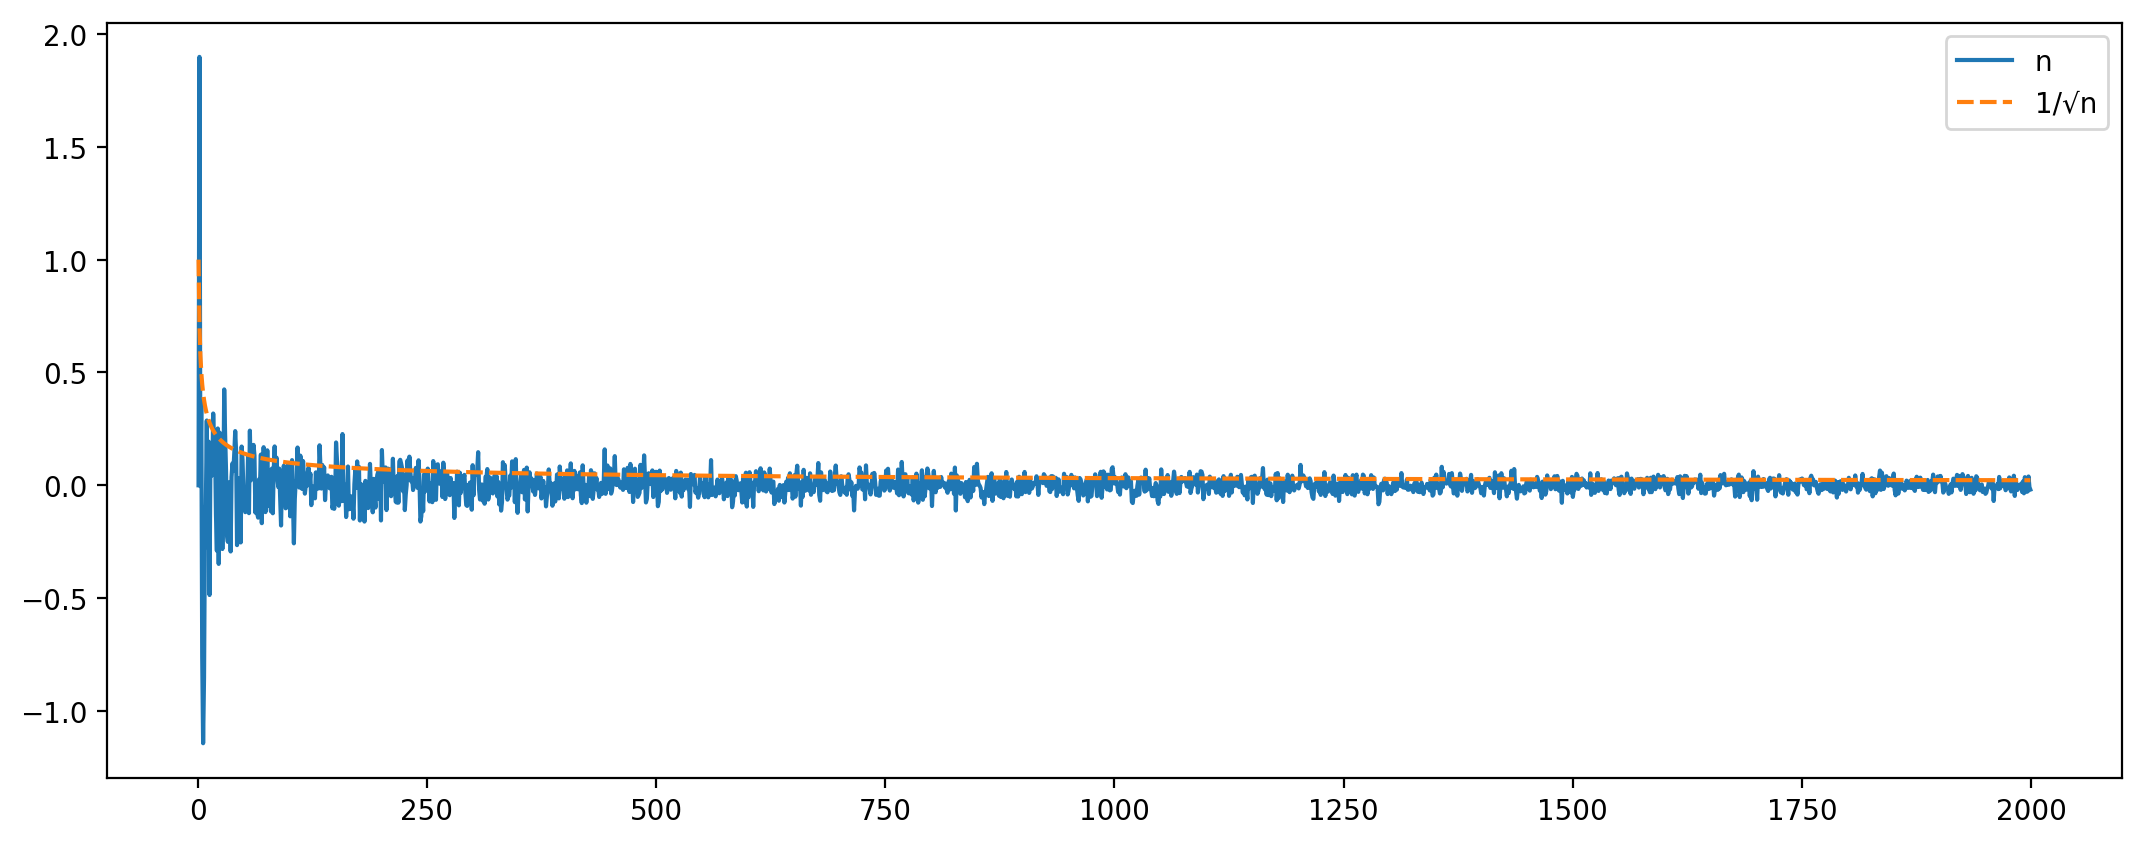

In [94]:
def plot_func(N):
  index = list(range(1, N))
  root_inverse_squared_index = [1/np.sqrt(i) for i in index]
  beta_hat = [getBetaHat(i) for i in index]
  stack = np.column_stack((beta_hat, root_inverse_squared_index))
  return pd.DataFrame(stack, index, ['n', '1/√n'])
plt.figure(figsize=(13,5), dpi=200)
# ax1 = sns.lineplot(data=plot_func(200))
ax = sns.lineplot(data=plot_func(2000))

We get a better fit as n increases.

# 4. Names and Frequencies

In [3]:
# fred_df = pd.read_csv('DF1', sep=",", header=None)
path =r'data/Names'
all_files = glob.glob(path + "/*.txt")

#all_files
i=0
year = 1880
li = []
for filename in all_files:
    df = pd.read_csv(filename, sep=",", header=None)
    df['year'] = year
    year = year+1
    li.append(df)
    i=i+1
#     print(i)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.index
frame  # this is the dataframe that has all the details combined together.
frame

,0,1,2,year
0,Emily,F,25953,1880
1,Hannah,F,23075,1880
2,Madison,F,19967,1880
3,Ashley,F,17997,1880
4,Sarah,F,17689,1880
5,Alexis,F,17627,1880
6,Samantha,F,17264,1880
7,Jessica,F,15705,1880
8,Elizabeth,F,15089,1880
9,Taylor,F,15077,1880


## 4.1 Write a program that on input k and XXXX, returns the top k names from year XXXX

In [29]:
# 4.1 Write a program that on input k and XXXX, returns the top k names from year XXXX
def getPopularNameGivenYear(year,top_val):
    is_year = frame['year']==year
    year_frame = frame[is_year]
    year_frame_sorted = year_frame.sort_values(2,ascending=False)
    return year_frame_sorted.head(top_val)

In [30]:
getPopularNameGivenYear(1880,5)

,0,1,2,year
17653,Jacob,M,34467,1880
17654,Michael,M,32028,1880
17655,Matthew,M,28572,1880
17656,Joshua,M,27534,1880
0,Emily,F,25953,1880


# 4.2 Write a program that on input Name, returns the frequency for men and women of the name Name
## To get name count across all the years gender wise

In [27]:
def getNameCountAll(name):
    frame_no_year = frame.drop(['year'], axis=1)
    given_name = frame_no_year[0]==name
    name_search = frame_no_year[given_name]
    result = name_search.groupby([0,1]).sum()
    return result 

In [49]:
## 4.2 Write a program that on input Name, returns the frequency for men and women of the name Name
## To get name count year wise and gender wise
def getNameCountByYear(name):
    #frame_no_year = frame.drop(['year'], axis=1)
    given_name = frame[0]==name
    name_search = frame[given_name]
    result = name_search.groupby([0,1,'year']).sum()
    return result 

In [50]:
#run the below function to get frequency for men and women for a given name across all the years
getNameCountAll('Aarya')

2
0     1      
Aarya F  1130
      M   283

In [51]:
#run the below function to get frequency for men and women for a given name across each year
getNameCountByYear('Aarya')

2
0     1 year     
Aarya F 1880    6
        1881  178
        1888  180
        1889    7
        1890   14
        1897   12
        1898  123
        1899   28
        1906   60
        1907  166
        1908   21
        1909  108
        1916   72
        1917   26
        1978   70
        1989   59
      M 1880    5
        1881   21
        1888   20
        1889    5
        1890   14
        1897   10
        1898   15
        1899   26
        1906   19
        1907   22
        1908   26
        1909   15
        1916   26
        1917   20
        1978   23
        1989   16

## 4.3 - Relative Frequency of given name

Our assumption is that the popularity for a given name includes both its female and male frequencies.

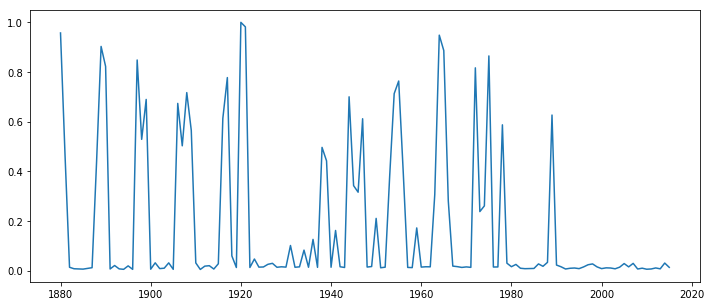

In [111]:
def calculateRelFreq(name):
    x_years = frame['year'].unique()
    y_freq = []
    is_name = frame[0]==name
    name_search = frame[is_name]
    total = name_search.groupby([0,'year']).sum()
    numYears = len(x_years)
    for i in range(numYears):
        y_freq.append(total[2][i])
    mostFrequent = max(y_freq)
    y_relFreq = np.divide(y_freq,mostFrequent)
    plt.figure(figsize=(12,5))
    plt.plot(x_years,y_relFreq)
    plt.show()

## Example:
calculateRelFreq('Jacob')

## 4.4 - Names popularity gender switch

In [4]:
# Approach :
# 1. We created two seperate data frames for females and males respectively from our master data frame
# 2. Joined both the data frames over name and year
# 3. For each name in each year by looking at the frequency we calculated whether that particular name
#    was a dominant male or dominant female name and labeled the it as 'DM' or 'DF'

female = frame[1]== 'F'
frame_allFemales = frame[female]
female_df = frame_allFemales
#female_df

male = frame[1]== 'M'
frame_allMales = frame[male]
male_df = frame_allMales
#male_df

In [10]:
# 4. Next, kept the required columns and grouped the users by their labels.
# 5. The result in df_clean2 may have dominant column entries as combination of DM and DF indicating that 
#    a switch was made. If it just had DM( dominant male ) or DF( dominant female) it means no switch was made.
# 6. To find the records / names that made the switch the search function looks for rows that have 
#     D and F and M strings in the dominant column.
# 7. Once it finds a match it indicates that the name had switched from Male to Female or vice versa once or more
#     than once.

unisex = pd.merge(male_df, female_df, how='inner', on=[0, 'year'])
df = unisex

df['dominant'] = np.where(df['2_x']>=df['2_y'], 'M', 'F')
df_clean = df.drop(['1_x','2_x','1_y','2_y','year'], axis=1)
df_clean        

df_clean
df_clean2 = df_clean.groupby([0]).sum()


def search(str):
    if ('F' in str and 'M' in str):
        return True
    else:
        return False
df_clean2

,dominant
0,
Aaden,M
Aadi,MMM
Aadyn,MM
Aalijah,MMMFMMMMMMMM
Aaliyah,FFFFFFFFFFFF
Aamari,MFMMMMMMM
Aamir,M
Aaren,MMMMMMMMMMFMFFMFMMMFFFFM
Aarian,MMMMM


### Following is the list of all names that used to be popular for one gender then became popular for another gender throughout the given time period:

In [7]:
countNames = 0
for index, row in df_clean2.iterrows():   
    if (search(row['dominant'])):
        print(index)
        countNames = countNames + 1

Aalijah
Aamari
Aaren
Aarin
Aaris
Aarya
Aaryn
Abie
Abijah
Abiola
Abishai
Abrar
Abriel
Aby
Adair
Adama
Adar
Addis
Addison
Addy
Adel
Adell
Adeola
Adi
Adisa
Adison
Adley
Adonai
Adoniah
Adrean
Adriann
Adrien
Adriene
Aeon
Agam
Ai
Aideen
Aidyn
Aidynn
Aijalon
Aiman
Aimar
Ainsley
Ajai
Ajene
Akai
Aki
Akili
Akira
Ala
Alaa
Albie
Aldean
Aldyn
Alee
Alexandria
Alexi
Alexie
Alexis
Alexius
Alexiz
Alexus
Alexx
Alexy
Alfie
Algie
Alie
Alija
Alika
Alin
Allex
Allie
Allison
Allyn
Almer
Alpha
Altair
Alva
Alvia
Aly
Alyn
Amadi
Amahri
Amandeep
Amando
Amani
Amanpreet
Amaree
Amari
Amarii
Amarri
Amauri
Amaurie
Amaziah
Amel
Amen
Ameya
Amil
Amillion
Amori
Amorie
Amory
Amrit
An
Anay
Andie
Andra
Andree
Andrell
Andrian
Angel
Angell
Anh
Anik
Anjel
Anmol
Anshu
Aquarius
Aquila
Aquilla
Ara
Arbie
Ardean
Ardel
Ardell
Arden
Ardie
Ardis
Aren
Areon
Arian
Arie
Ariel
Arien
Aries
Arin
Arion
Aris
Ariyan
Ariyon
Arlee
Arleigh
Arlen
Arley
Arlie
Arlin
Arlis
Arliss
Arly
Arlyn
Arlynn
Armahni
Armani
Armanie
Armanii
Armoni
Arnel
Arnell
Arni

Posie
Prabhjot
Preet
Prentiss
Presley
Pressley
Psalm
Puneet
Qamar
Quanah
Quanta
Quilla
Quincey
Quinn
Quinta
Raeden
Raedyn
Rael
Raeshawn
Ragan
Rain
Rainey
Rainn
Raja
Rajah
Raleigh
Rama
Rameen
Ramey
Rami
Ramie
Ramsay
Rande
Randie
Rane
Ranell
Rashawn
Rasheen
Rashi
Rashon
Ratha
Raven
Ravin
Rayen
Raylan
Raylee
Raylen
Rayn
Rayne
Raynell
Reace
Reagan
Rease
Rebel
Reda
Redell
Reese
Refugio
Regan
Rei
Reign
Reiley
Reilley
Reilly
Reily
Rein
Reise
Reiss
Remi
Remmy
Remy
Rene
Renell
Renn
Renne
Rennie
Renny
Reyes
Rhen
Rhian
Rhiley
Rhyan
Rhyen
Rhylan
Rhylin
Rhyse
Rhythm
Rian
Ricci
Richie
Ricki
Rickie
Ridley
Rieley
Rielly
Riely
Riki
Rikki
Riko
Riley
Rilley
Rio
Riven
Rivers
Riyaan
Riyan
Rmani
Robbie
Robbin
Roben
Robi
Robie
Robin
Rochell
Rockie
Roe
Rogue
Roi
Rollins
Romaine
Romani
Romell
Romi
Romie
Romney
Romy
Ronda
Ronell
Roni
Ronie
Ronne
Ronnie
Rooney
Rorey
Rosario
Roshaun
Roshawn
Rossi
Rossie
Rowan
Rowen
Royale
Roye
Rozell
Ruari
Ruble
Rudell
Rudi
Rue
Rumi
Ryen
Ryian
Ryin
Ryley
Rylin
Rynn
Ryver
Saber
Sa

In [97]:
print("There were {} names which saw a switch in popularity from male to female or vice versa".format(countNames))

There were 2496 names which saw a switch in popularity from male to female or vice versa


## 5 - Regression and Interaction Terms

In [8]:
kidiq = pd.read_stata('data/ARM_Data/child.iq/kidiq.dta')

In [9]:
df_iq = kidiq

In [10]:
df_iq['mom_hs*mom_iq'] = df_iq['mom_hs'] * df_iq['mom_iq']
df_iq.tail(4)

,kid_score,mom_hs,mom_iq,mom_work,mom_age,mom_hs*mom_iq
430,76,1.0,92.990392,4,23,92.990392
431,50,0.0,94.859708,2,24,0.000000
432,88,1.0,96.856624,2,21,96.856624
433,70,1.0,91.253336,2,25,91.253336


In [14]:
kidiq_X = df_iq.as_matrix(["mom_iq","mom_hs","mom_hs*mom_iq"])
kidiq_Y = kidiq.as_matrix(["kid_score"])
lr = linear_model.LinearRegression()
lr.fit(kidiq_X,kidiq_Y)
print (lr.coef_, lr.intercept_)

[[ 0.96888921 51.26822343 -0.48427467]] [-11.48202114]


/Users/sharang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/sharang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


The model of the form then becomes:

$${\rm kid.score} = -11.48 + 0.97 * {\rm mom\_iq} + 51.27 * {\rm mom\_hs} - 0.48 * {\rm mom\_hs * \rm mom\_iq}$$

/Users/sharang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/Users/sharang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


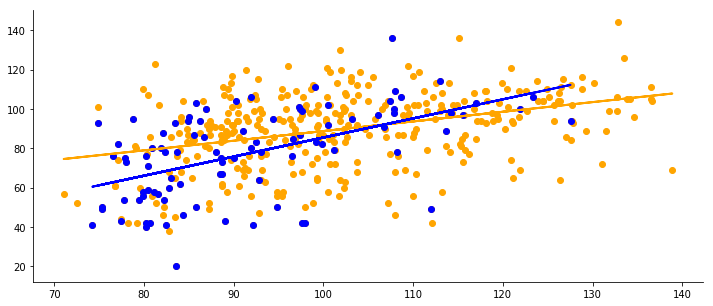

In [15]:
kidiq_hs = df_iq[kidiq.mom_hs==1]
kidiq_nohs = df_iq[kidiq.mom_hs==0]
X_hs_iq = df_iq["mom_iq"]
Y_hs_iq = df_iq["kid_score"]
X_nohs_iq = kidiq_nohs.as_matrix(["mom_iq"])
Y_nohs_iq = kidiq_nohs.as_matrix(["kid_score"])

# And we can plot the fit again:
plt.figure(figsize=(12,5))
plt.scatter(X_hs_iq, Y_hs_iq,  color='orange')
plt.scatter(X_nohs_iq, Y_nohs_iq,  color='blue')
plt.plot(X_hs_iq, -11.48+0.97*X_hs_iq + 51.27-0.48*X_hs_iq, color='orange',
         linewidth=2)
plt.plot(X_nohs_iq, -11.48+0.97*X_nohs_iq, color='blue',
         linewidth=2)
sns.despine()

The resulting plot after adding the interaction term shows an upward shift in the slope of the fitted line for when the 'mom_hs' variable is 0. The black line, representing the sub-group for when 'mom_hs' is 1, is more or less the same as before and follows a similar slope that was in the earlier graph. But the blue line, that represents the sub-group for when 'mom_hs' is 0, is very different now. According to this model, the iq of the mother variable becomes more significant when the mother has not gone to high school. The interaction term should not be there because it is inflating the coefficient of 'mom_iq.'